In [1]:
%matplotlib inline

In [8]:
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pearls.gaussian_processes import gp_sample_custom, dataframe_from_gp_samples

# shortcuts
tfd = tfp.distributions
kernels = tfp.math.psd_kernels

# constants
n_features = 1 # dimensionality
n_index_points = 256 # nbr of index points
n_samples = 5 # nbr of GP prior samples
jitter = 1e-6
kernel_cls = kernels.ExponentiatedQuadratic

seed = 42 # set random seed for reproducibility
random_state = np.random.RandomState(seed)

# index points
X_q = np.linspace(-1.0, 1.0, n_index_points).reshape(-1, n_features)

# kernel specification
amplitude, length_scale_inv = np.ogrid[1.5:3.6:1.5, 10.0:0.5:-2.0]
length_scale = 1.0 / length_scale_inv
kernel = kernel_cls(amplitude=amplitude, length_scale=length_scale)

In [9]:
# instantiate Gaussian Process
gp = tfd.GaussianProcess(kernel=kernel, index_points=X_q, jitter=jitter)
gp_samples = gp_sample_custom(gp, n_samples, seed=seed)

with tf.Session() as sess:
    gp_samples_arr = sess.run(gp_samples)

data = dataframe_from_gp_samples(gp_samples_arr, X_q, amplitude,
                                 length_scale, n_samples)

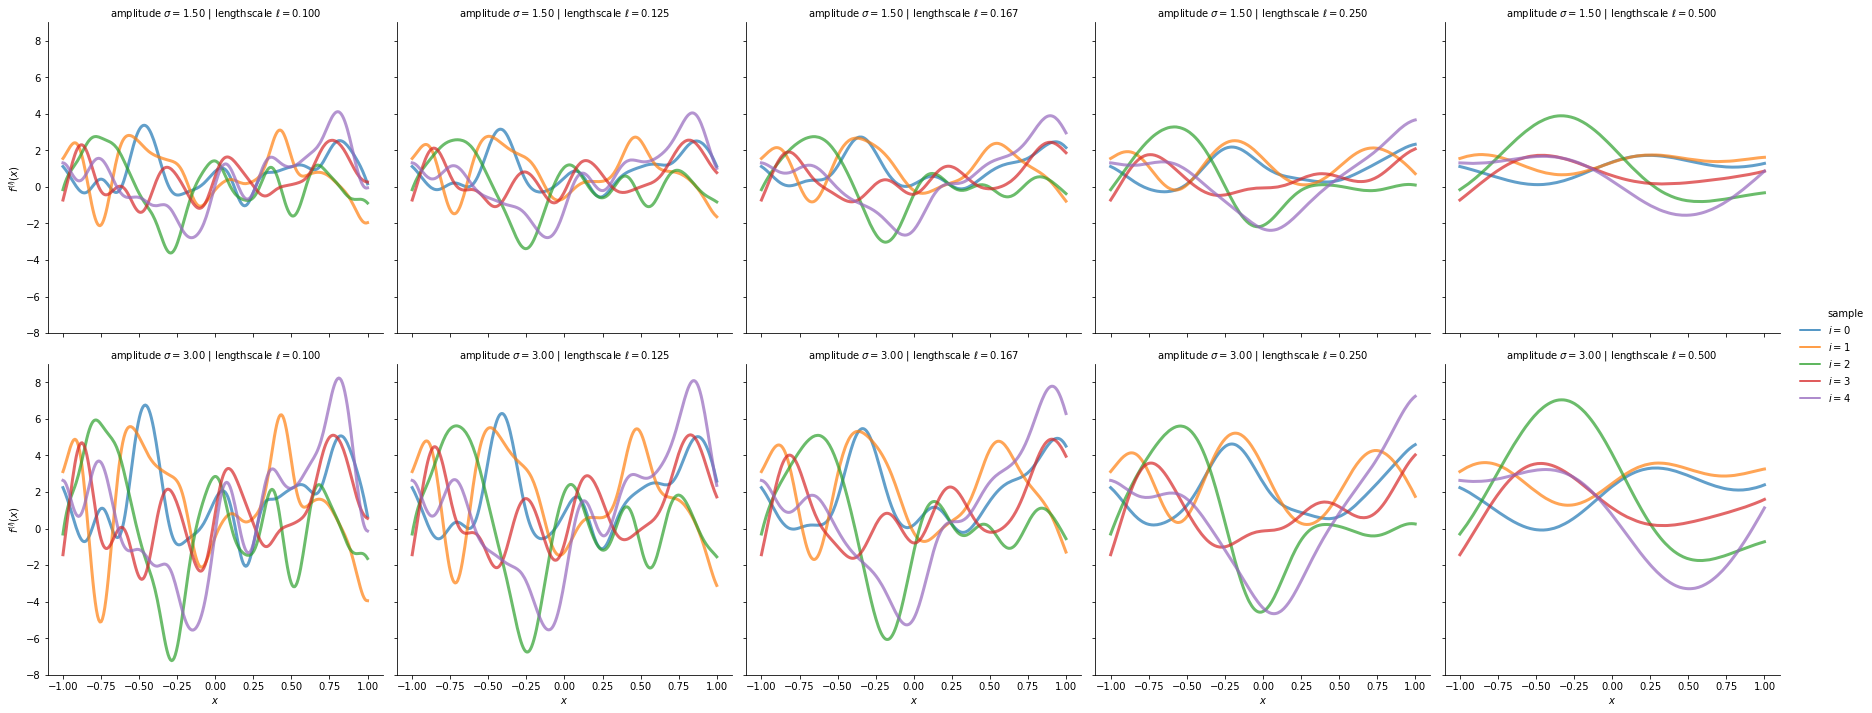

In [10]:
g = sns.relplot(x="index_point", y="function_value", hue="sample",
                row="amplitude", col="length_scale", height=5.0, aspect=1.0,
                kind="line", data=data, alpha=0.7, linewidth=3.0)
g.set_titles(row_template=r"amplitude $\sigma={{{row_name:.2f}}}$",
             col_template=r"lengthscale $\ell={{{col_name:.3f}}}$")
g.set_axis_labels(r"$x$", r"$f^{(i)}(x)$")

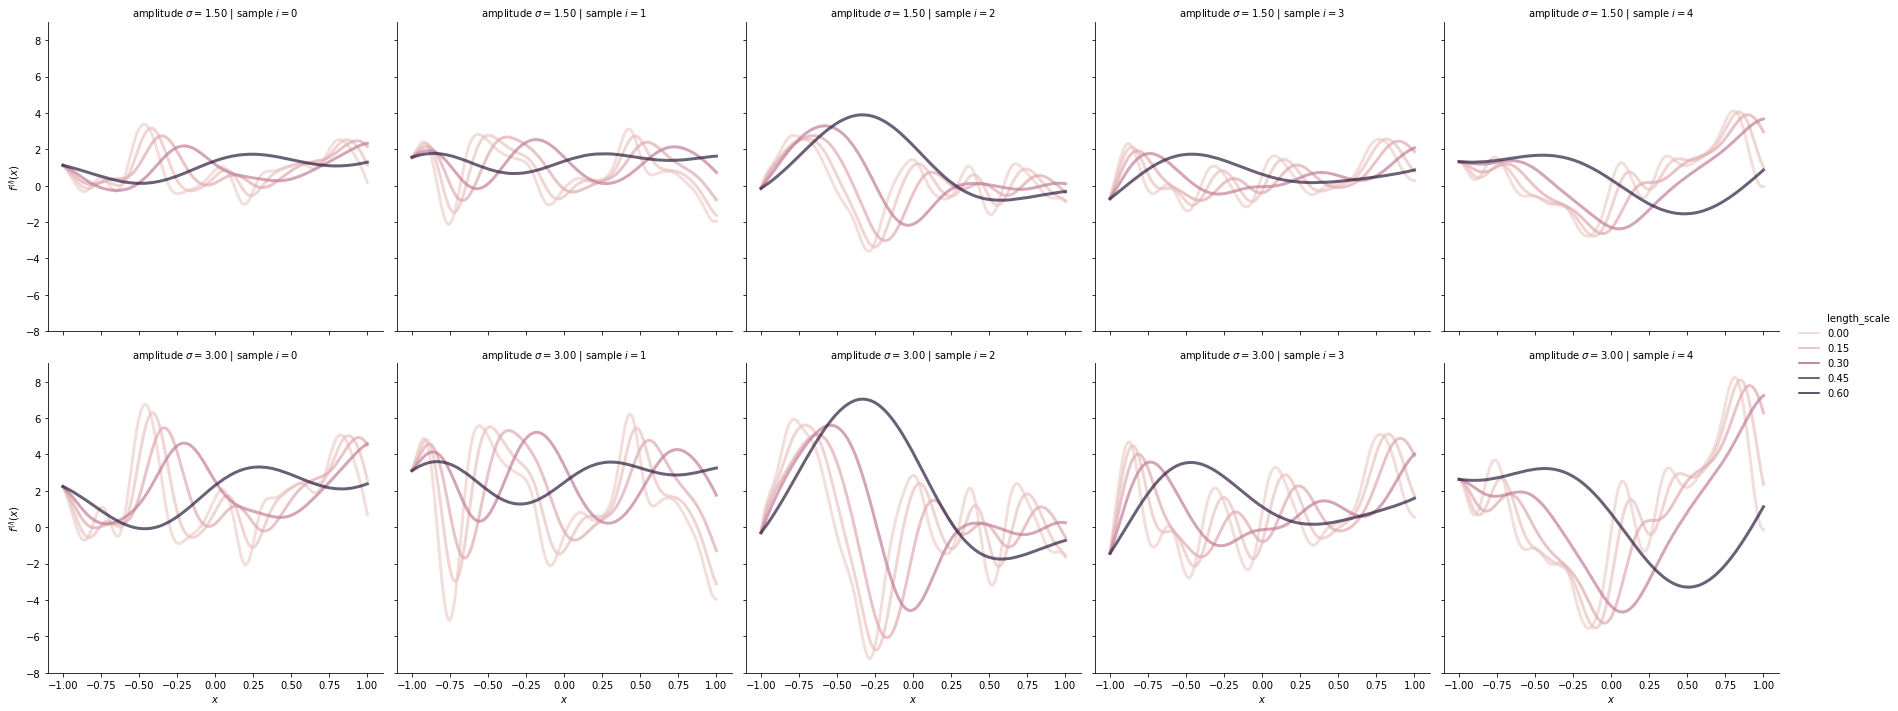

In [11]:
g = sns.relplot(x="index_point", y="function_value", hue="length_scale",
                row="amplitude", col="sample", height=5.0, aspect=1.0,
                kind="line", data=data, alpha=0.7, linewidth=3.0)
g.set_titles(row_template=r"amplitude $\sigma={{{row_name:.2f}}}$",
             col_template=r"sample {col_name}")
g.set_axis_labels(r"$x$", r"$f^{(i)}(x)$")

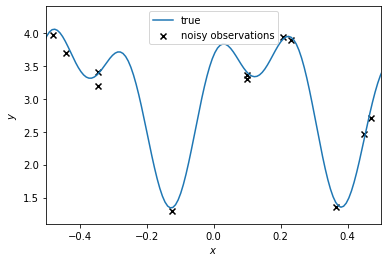

In [12]:
n_train = 12 # nbr training points in synthetic dataset
observation_noise_variance = 0.1

f = lambda x: np.sin(12.0*x) + 0.66*np.cos(25.0*x) + 3.0

X = random_state.rand(n_train, n_features) - 0.5
eps = observation_noise_variance * random_state.randn(n_train, n_features)
Y = np.squeeze(f(X) + eps)

fig, ax = plt.subplots()

ax.plot(X_q, f(X_q), label="true")
ax.scatter(X, Y, marker='x', color='k', label="noisy observations")

ax.legend()

ax.set_xlim(-0.5, 0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

In [13]:
gprm = tfd.GaussianProcessRegressionModel(
    kernel=kernel, index_points=X_q, observation_index_points=X, observations=Y,
    observation_noise_variance=0.0, jitter=jitter
)

gp_samples = gp_sample_custom(gprm, n_samples, seed=seed)

with tf.Session() as sess:
    gp_samples_arr = sess.run(gp_samples)

data = dataframe_from_gp_samples(gp_samples_arr, X_q, amplitude,
                                 length_scale, n_samples)

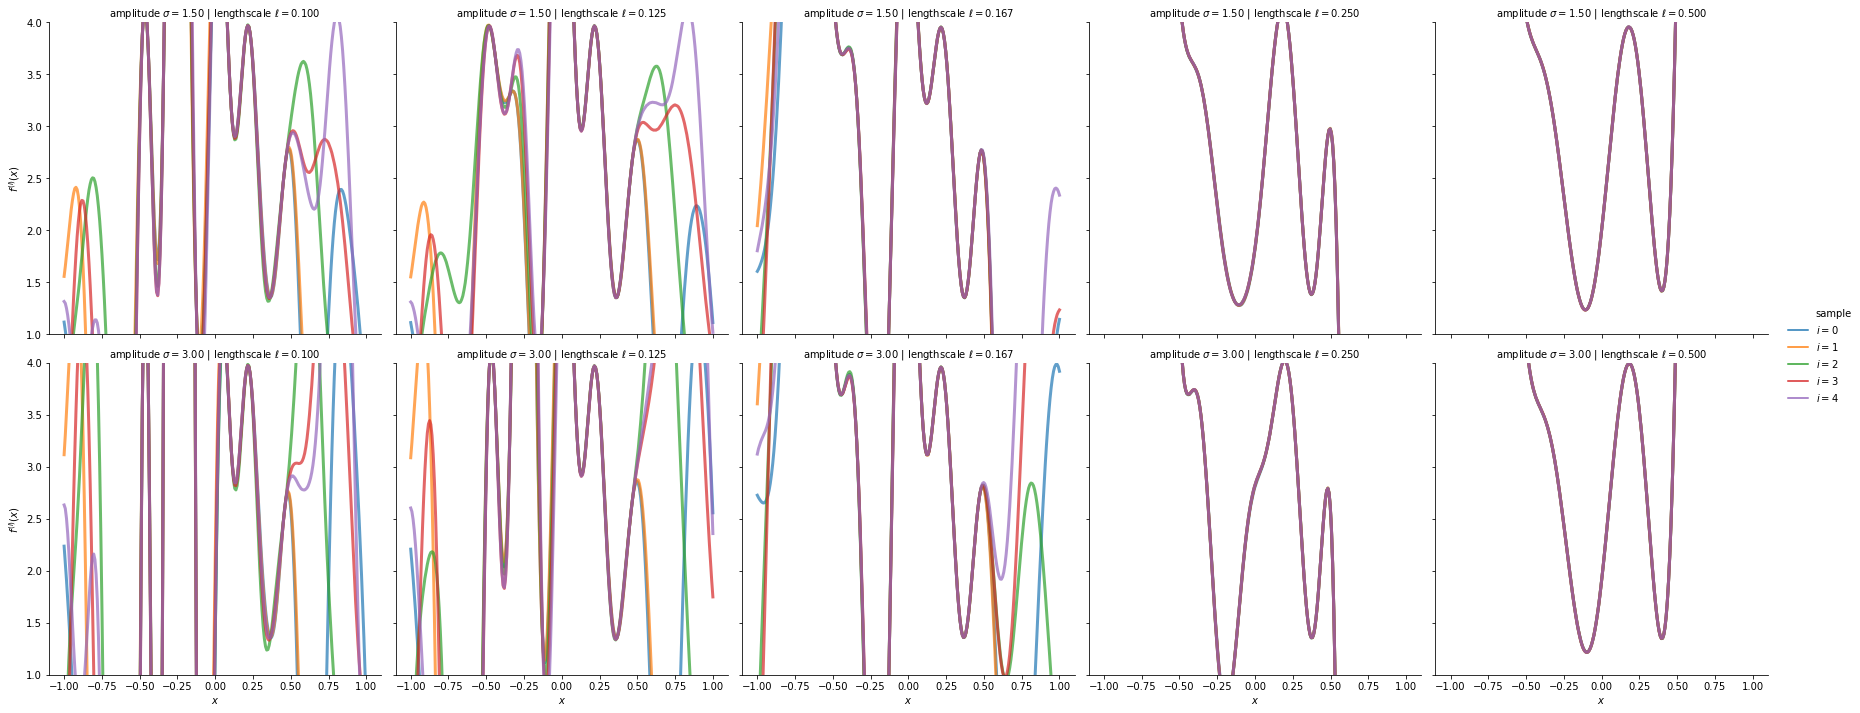

In [16]:
g = sns.relplot(x="index_point", y="function_value", hue="sample",
                row="amplitude", col="length_scale", height=5.0, aspect=1.0,
                kind="line", data=data, alpha=0.7, linewidth=3.0)
g.set_titles(row_template=r"amplitude $\sigma={{{row_name:.2f}}}$",
             col_template=r"lengthscale $\ell={{{col_name:.3f}}}$")
g.set_axis_labels(r"$x$", r"$f^{(i)}(x)$")
g.set(ylim=(1, 4))

In [3]:
# instantiate Gaussian Process
gp = tfd.GaussianProcess(kernel=kernel, index_points=X_q, jitter=jitter)
gp_samples = gp_sample_custom(gp, n_samples, seed=seed)

with tf.Session() as sess:
    gp_samples_arr = sess.run(gp_samples)

data = dataframe_from_gp_samples(gp_samples_arr, X_q, amplitude,
                                 length_scale, n_samples)

In [7]:
gprm = tfd.GaussianProcessRegressionModel(
    kernel=kernel, index_points=X_q, observation_index_points=X, observations=Y,
    observation_noise_variance=0.0, jitter=jitter
)
gp_samples = gp_sample_custom(gprm, n_samples, seed=seed)

with tf.Session() as sess:
    gp_samples_arr = sess.run(gp_samples)

data = dataframe_from_gp_samples(gp_samples_arr, X_q, amplitude,
                                 length_scale, n_samples)

In [22]:
amplitude, length_scale = np.ogrid[5e-2:4.0:100j, 1e-5:5e-1:100j]
kernel = kernel_cls(amplitude=amplitude, length_scale=length_scale)

In [36]:
# We'll use an unconditioned GP to train the kernel parameters.
gp = tfd.GaussianProcess(
    kernel=kernel,
    index_points=X,
    observation_noise_variance=observation_noise_variance
)

In [37]:
gp

<tfp.distributions.GaussianProcess 'GaussianProcess_5' batch_shape=[100, 100] event_shape=[12] dtype=float64>

In [38]:
neg_log_likelihood = - gp.log_prob(Y)
neg_log_likelihood

<tf.Tensor 'Neg_2:0' shape=(100, 100) dtype=float64>

In [39]:
from mpl_toolkits.mplot3d import Axes3D

In [34]:
_amplitude, _length_scale = np.broadcast_arrays(amplitude, length_scale)

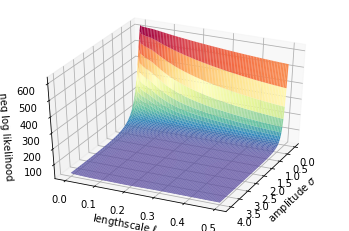

In [35]:
fig, ax = plt.subplots(subplot_kw=dict(projection="3d", azim=25, elev=35))

with tf.Session() as sess:

    ax.plot_surface(amplitude, length_scale, sess.run(neg_log_likelihood), 
                    rstride=1, cstride=1, edgecolor='none', cmap="Spectral_r")

# ax.scatter(*Z.T)
# ax.plot_wireframe(X_q, np.log(T_q) / np.log(3), Y_q, cstride=0, alpha=0.6)
# ax.plot_surface(X_q, np.log(T_q) / np.log(3), Y_q, rstride=1, cstride=1, 
#                 edgecolor='none', cmap="magma", alpha=0.8)

ax.set_xlabel(r"amplitude $\sigma$")
ax.set_ylabel(r"lengthscale $\ell$")
ax.set_zlabel("neg log likelihood")

# ax.yaxis.set_scale('log')

plt.show()

In [29]:
Z = np.dstack(np.broadcast_arrays(length_scale[...,10::20], amplitude[10::20])).reshape(-1, 2)
Z.shape

(25, 2)

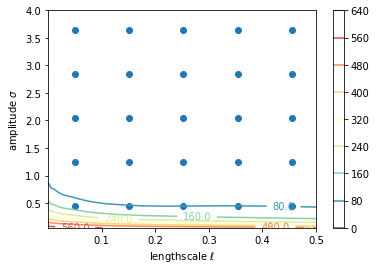

In [30]:
fig, ax = plt.subplots()

ax.scatter(*Z.T)

with tf.Session() as sess:

#     ax.plot_surface(amplitude, length_scale, sess.run(neg_log_likelihood), cmap="coolwarm")
    contours = ax.contour(_length_scale, _amplitude, sess.run(neg_log_likelihood), cmap="Spectral_r")

fig.colorbar(contours, ax=ax)
ax.clabel(contours, fmt='%.1f')

ax.set_xlabel(r"lengthscale $\ell$")
ax.set_ylabel(r"amplitude $\sigma$")

plt.show()

In [59]:
kernel = kernel_cls(amplitude=amplitude[10::20], length_scale=length_scale[...,10::20])

In [66]:
amplitude[::-20]

array([[4.        ],
       [3.2020202 ],
       [2.4040404 ],
       [1.60606061],
       [0.80808081]])

In [60]:
def dateplot(X, Y, ax=None, *args, **kwargs):

    if ax is None:
        ax = plt.gca()

    ax.scatter(X, Y, s=8.0**2, marker='x', color='k')

In [61]:
gprm = tfd.GaussianProcessRegressionModel(
    kernel=kernel, index_points=X_q, observation_index_points=X, observations=Y,
    observation_noise_variance=0.0, jitter=jitter
)

gp_samples = gp_sample_custom(gprm, n_samples, seed=seed)

with tf.Session() as sess:
    gp_samples_arr = sess.run(gp_samples)

data = dataframe_from_gp_samples(gp_samples_arr, X_q, 
                                 amplitude[10::20],
                                 length_scale[...,10::20], n_samples)

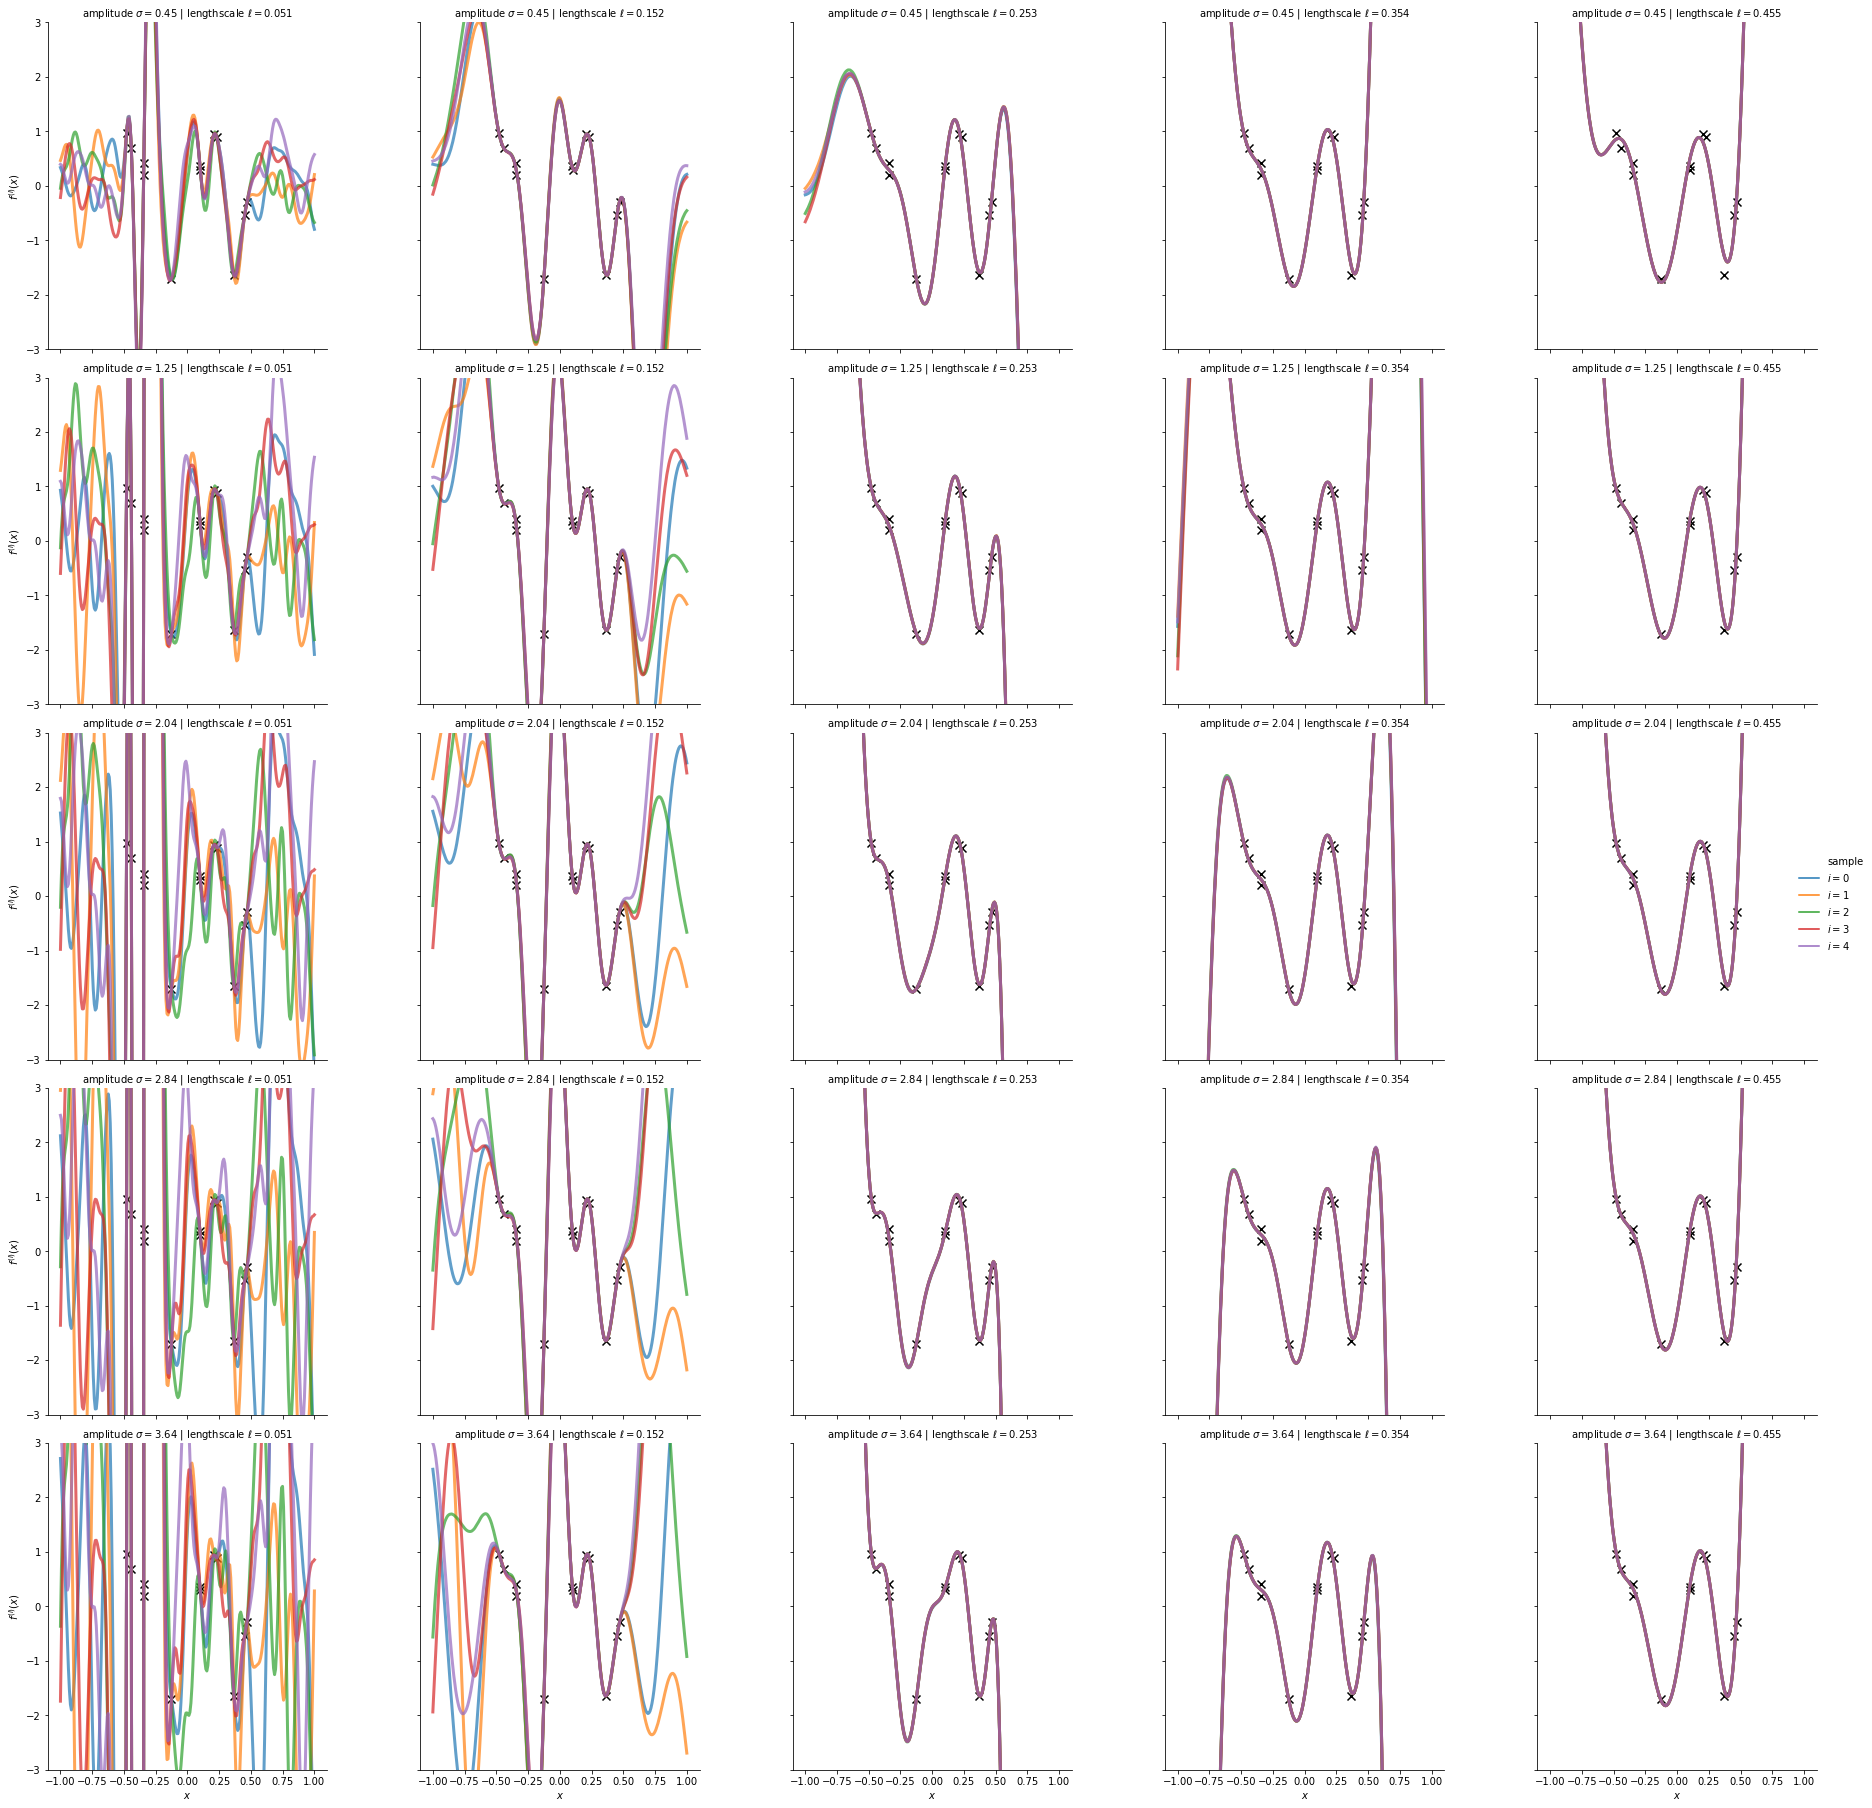

In [62]:
g = sns.relplot(x="index_point", y="function_value", hue="sample",
                row="amplitude", col="length_scale", height=5.0, aspect=1.0,
                kind="line", data=data, alpha=0.7, linewidth=3.0)
g.map(dateplot, X=X, Y=Y)
g.set_titles(row_template=r"amplitude $\sigma={{{row_name:.2f}}}$",
             col_template=r"lengthscale $\ell={{{col_name:.3f}}}$")
g.set_axis_labels(r"$x$", r"$f^{(i)}(x)$")

g.set(ylim=(-3, 3))

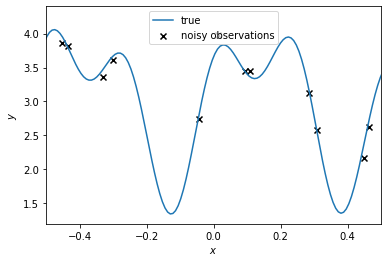

In [31]:
n_train = 12 # nbr training points in synthetic dataset
observation_noise_variance = 0.1

f = lambda x: np.sin(12.0*x) + 0.66*np.cos(25.0*x) + 3.0

X = random_state.rand(n_train, n_features) - 0.5
eps = observation_noise_variance * random_state.randn(n_train, n_features)
Y = np.squeeze(f(X) + eps)

fig, ax = plt.subplots()

ax.plot(X_q, f(X_q), label="true")
ax.scatter(X, Y, marker='x', color='k', label="noisy observations")

ax.legend()

ax.set_xlim(-0.5, 0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

In [3]:
# # instantiate Gaussian Process
# gp = tfd.GaussianProcess(kernel=kernel, index_points=X_q, jitter=jitter)
# gp_samples = gp_sample_custom(gp, n_samples, seed=seed)

# with tf.Session() as sess:
#     gp_samples_arr = sess.run(gp_samples)

# data = dataframe_from_gp_samples(gp_samples_arr, X_q, amplitude,
#                                  length_scale, n_samples)

In [4]:
# g = sns.relplot(x="index_point", y="function_value", hue="sample",
#                 row="amplitude", col="length_scale", height=5.0, aspect=1.0,
#                 kind="line", data=data, alpha=0.7, linewidth=3.0)
# g.set_titles(row_template=r"amplitude $\sigma={{{row_name:.2f}}}$",
#              col_template=r"lengthscale $\ell={{{col_name:.3f}}}$")
# g.set_axis_labels(r"$x$", r"$f^{(i)}(x)$")

In [5]:
# g = sns.relplot(x="index_point", y="function_value", hue="length_scale",
#                 row="amplitude", col="sample", height=5.0, aspect=1.0,
#                 kind="line", data=data, alpha=0.7, linewidth=3.0)
# g.set_titles(row_template=r"amplitude $\sigma={{{row_name:.2f}}}$",
#              col_template=r"sample {col_name}")
# g.set_axis_labels(r"$x$", r"$f^{(i)}(x)$")

In [ ]:
n_train = 12 # nbr training points in synthetic dataset
observation_noise_variance = 0.1

f = lambda x: np.sin(12.0*x) + 0.66*np.cos(25.0*x) + 3.0

X = random_state.rand(n_train, n_features) - 0.5
eps = observation_noise_variance * random_state.randn(n_train, n_features)
Y = f(X) + eps
y = Y.squeeze()

fig, ax = plt.subplots()

ax.plot(X_q, f(X_q), label="true")
ax.scatter(X, y, marker='x', color='k', label="noisy observations")

ax.legend()

ax.set_xlim(-0.5, 0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

In [17]:
# # Generate noisy observations from a known function at some random points.
# observation_noise_variance = 0.5
# f = lambda x: np.sin(10.0*x[..., 0]) * np.exp(-x[..., 0]**2)
# X = np.random.uniform(-1., 1., 50)[..., np.newaxis]
# Y = f(X) + np.random.normal(0., np.sqrt(observation_noise_variance))

In [18]:
X_q.shape

(256, 1)

In [19]:
X.shape

(12, 1)

In [20]:
f(X)

array([[2.84326774],
       [3.38720854],
       [2.14824854],
       [1.40486065],
       [3.41531411],
       [1.77434684],
       [3.54548582],
       [3.65077625],
       [3.97613486],
       [1.91118445],
       [1.40943372],
       [3.16937854]])

In [21]:
y.shape

(12,)

In [22]:
observation_noise_variance

0.1

In [23]:
jitter

1e-15

In [24]:
gprm = tfd.GaussianProcessRegressionModel(
    kernel=kernel, index_points=X_q, observation_index_points=X, observations=y,
    observation_noise_variance=observation_noise_variance, jitter=jitter
)

# gp_samples = gp_sample_custom(gprm, n_samples, seed=seed)
gp_samples = gprm.sample(n_samples, seed=seed)

with tf.Session() as sess:
    gp_samples_arr = sess.run(gp_samples)

data = dataframe_from_gp_samples(gp_samples_arr, X_q, amplitude,
                                 length_scale, n_samples)

In [25]:
# Define a kernel with trainable parameters. Note we transform the trainable
# variables to apply a positivity constraint.
amplitude = tf.exp(tf.Variable(np.float64(0)), name='amplitude')
length_scale_inv = tf.exp(tf.Variable(np.float64(0)), name='length_scale')
length_scale = 1.0 / length_scale_inv
observation_noise_variance = tf.exp(tf.Variable(np.float64(-5)), name='observation_noise_variance')

In [26]:
kernel = kernel_cls(amplitude=amplitude, length_scale=length_scale)

In [27]:
# We'll use an unconditioned GP to train the kernel parameters.
gp = tfd.GaussianProcess(
    kernel=kernel,
    index_points=X,
    observation_noise_variance=observation_noise_variance
)

In [28]:
neg_log_likelihood = - gp.log_prob(y)

optimizer = tf.train.AdamOptimizer(learning_rate=.05, beta1=.5, beta2=.99)
optimize = optimizer.minimize(neg_log_likelihood)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [29]:
# Now execute the above ops in a Session, first training the model
# parameters, then drawing and plotting posterior samples.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(1000):
        _, neg_log_likelihood_ = sess.run([optimize, neg_log_likelihood])
        if i % 100 == 0:
            print("Step {}: NLL = {}".format(i, neg_log_likelihood_))

    print("Final NLL = {}".format(neg_log_likelihood_))
    print(sess.run([amplitude, length_scale, observation_noise_variance]))

Step 0: NLL = 552.0356858872938
Step 100: NLL = 17.86083023722804
Step 200: NLL = 17.534004462063262
Step 300: NLL = 17.478038462724367
Step 400: NLL = 17.388761314505672
Step 500: NLL = 17.252293529908183
Step 600: NLL = 17.05456647442109
Step 700: NLL = 16.78603073165256
Step 800: NLL = 16.454469333864544
Step 900: NLL = 16.413799186299293
Final NLL = 15.989457098143298
[2.9512124440624556, 0.11461806472865418, 0.0004460431764714186]


In [1]:
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
from pearls.gaussian_processes import gp_sample_custom, dataframe_from_gp_samples

# shortcuts
tfd = tfp.distributions
kernels = tfp.math.psd_kernels

# constants
n_features = 1 # dimensionality
n_index_points = 256 # nbr of index points
n_samples = 5 # nbr of GP prior samples
jitter = 1e-6
kernel_cls = kernels.ExponentiatedQuadratic

seed = 42 # set random seed for reproducibility
random_state = np.random.RandomState(seed)

# index points
X_q = np.linspace(-1.0, 1.0, n_index_points).reshape(-1, n_features)

# kernel specification
amplitude, length_scale = np.ogrid[5e-2:4.0:100j, 1e-5:5e-1:100j]
kernel = kernel_cls(amplitude=amplitude, length_scale=length_scale)

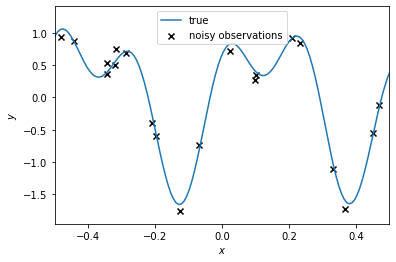

In [2]:
n_train = 20 # nbr training points in synthetic dataset
observation_noise_variance = 0.1

f = lambda x: np.sin(12.0*x) + 0.66*np.cos(25.0*x)

X = random_state.rand(n_train, n_features) - 0.5
eps = observation_noise_variance * random_state.randn(n_train, n_features)
Y = np.squeeze(f(X) + eps)

fig, ax = plt.subplots()

ax.plot(X_q, f(X_q), label="true")
ax.scatter(X, Y, marker='x', color='k', label="noisy observations")

ax.legend()

ax.set_xlim(-0.5, 0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

In [3]:
gp = tfd.GaussianProcess(
    kernel=kernel,
    index_points=X,
    observation_noise_variance=observation_noise_variance
)

In [4]:
nll = - gp.log_prob(Y)
nll

<tf.Tensor 'Neg:0' shape=(100, 100) dtype=float64>

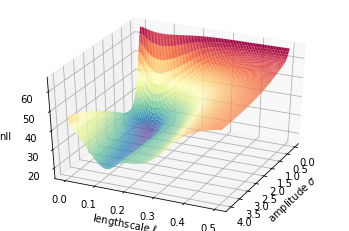

In [5]:
fig, ax = plt.subplots(subplot_kw=dict(projection="3d", azim=25, elev=35))

with tf.Session() as sess:

    ax.plot_surface(amplitude, length_scale, sess.run(nll),
                    rstride=1, cstride=1, edgecolor='none', cmap="Spectral_r")

ax.set_xlabel(r"amplitude $\sigma$")
ax.set_ylabel(r"lengthscale $\ell$")
ax.set_zlabel("nll")

plt.show()

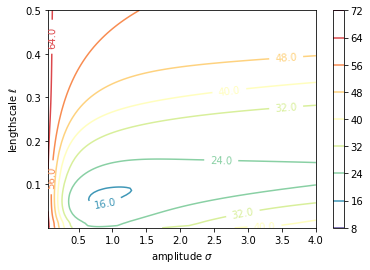

In [6]:
_amplitude, _length_scale = np.broadcast_arrays(amplitude, length_scale)

fig, ax = plt.subplots()

with tf.Session() as sess:

    contours = ax.contour(_amplitude, _length_scale, sess.run(nll), cmap="Spectral_r")

fig.colorbar(contours, ax=ax)
ax.clabel(contours, fmt='%.1f')

ax.set_xlabel(r"amplitude $\sigma$")
ax.set_ylabel(r"lengthscale $\ell$")

plt.show()

In [7]:
Z = np.dstack(np.broadcast_arrays(amplitude[10:50:8], length_scale[...,5:45:8])).reshape(-1, 2)
Z.shape

(25, 2)

In [8]:
_amplitude, _length_scale = np.broadcast_arrays(amplitude, length_scale)

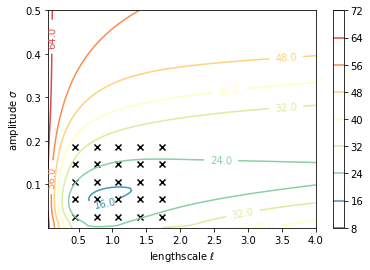

In [9]:
fig, ax = plt.subplots()

ax.scatter(*Z.T, color='k', marker='x')

with tf.Session() as sess:

#     ax.plot_surface(amplitude, length_scale, sess.run(neg_log_likelihood), cmap="coolwarm")
    contours = ax.contour(_amplitude, _length_scale, sess.run(nll), cmap="Spectral_r")

fig.colorbar(contours, ax=ax)
ax.clabel(contours, fmt='%.1f')

ax.set_xlabel(r"lengthscale $\ell$")
ax.set_ylabel(r"amplitude $\sigma$")

plt.show()

In [10]:
amplitude, length_scale = amplitude[10:50:8], length_scale[...,5:45:8]
kernel = kernel_cls(amplitude=amplitude, length_scale=length_scale)

In [11]:
gprm = tfd.GaussianProcessRegressionModel(
    kernel=kernel, index_points=X_q, observation_index_points=X, observations=Y,
    observation_noise_variance=0.0, jitter=jitter
)

gp_samples = gp_sample_custom(gprm, n_samples, seed=seed)

with tf.Session() as sess:
    gp_samples_arr = sess.run(gp_samples)

data = dataframe_from_gp_samples(gp_samples_arr, X_q, 
                                 amplitude, length_scale,
                                 n_samples)

In [12]:
def dateplot(X, Y, ax=None, *args, **kwargs):

    if ax is None:
        ax = plt.gca()

    ax.scatter(X, Y, s=8.0**2, marker='x', color='k')

In [14]:
data = dataframe_from_gp_samples(gp_samples_arr, X_q,
                                 amplitude, length_scale, n_samples)

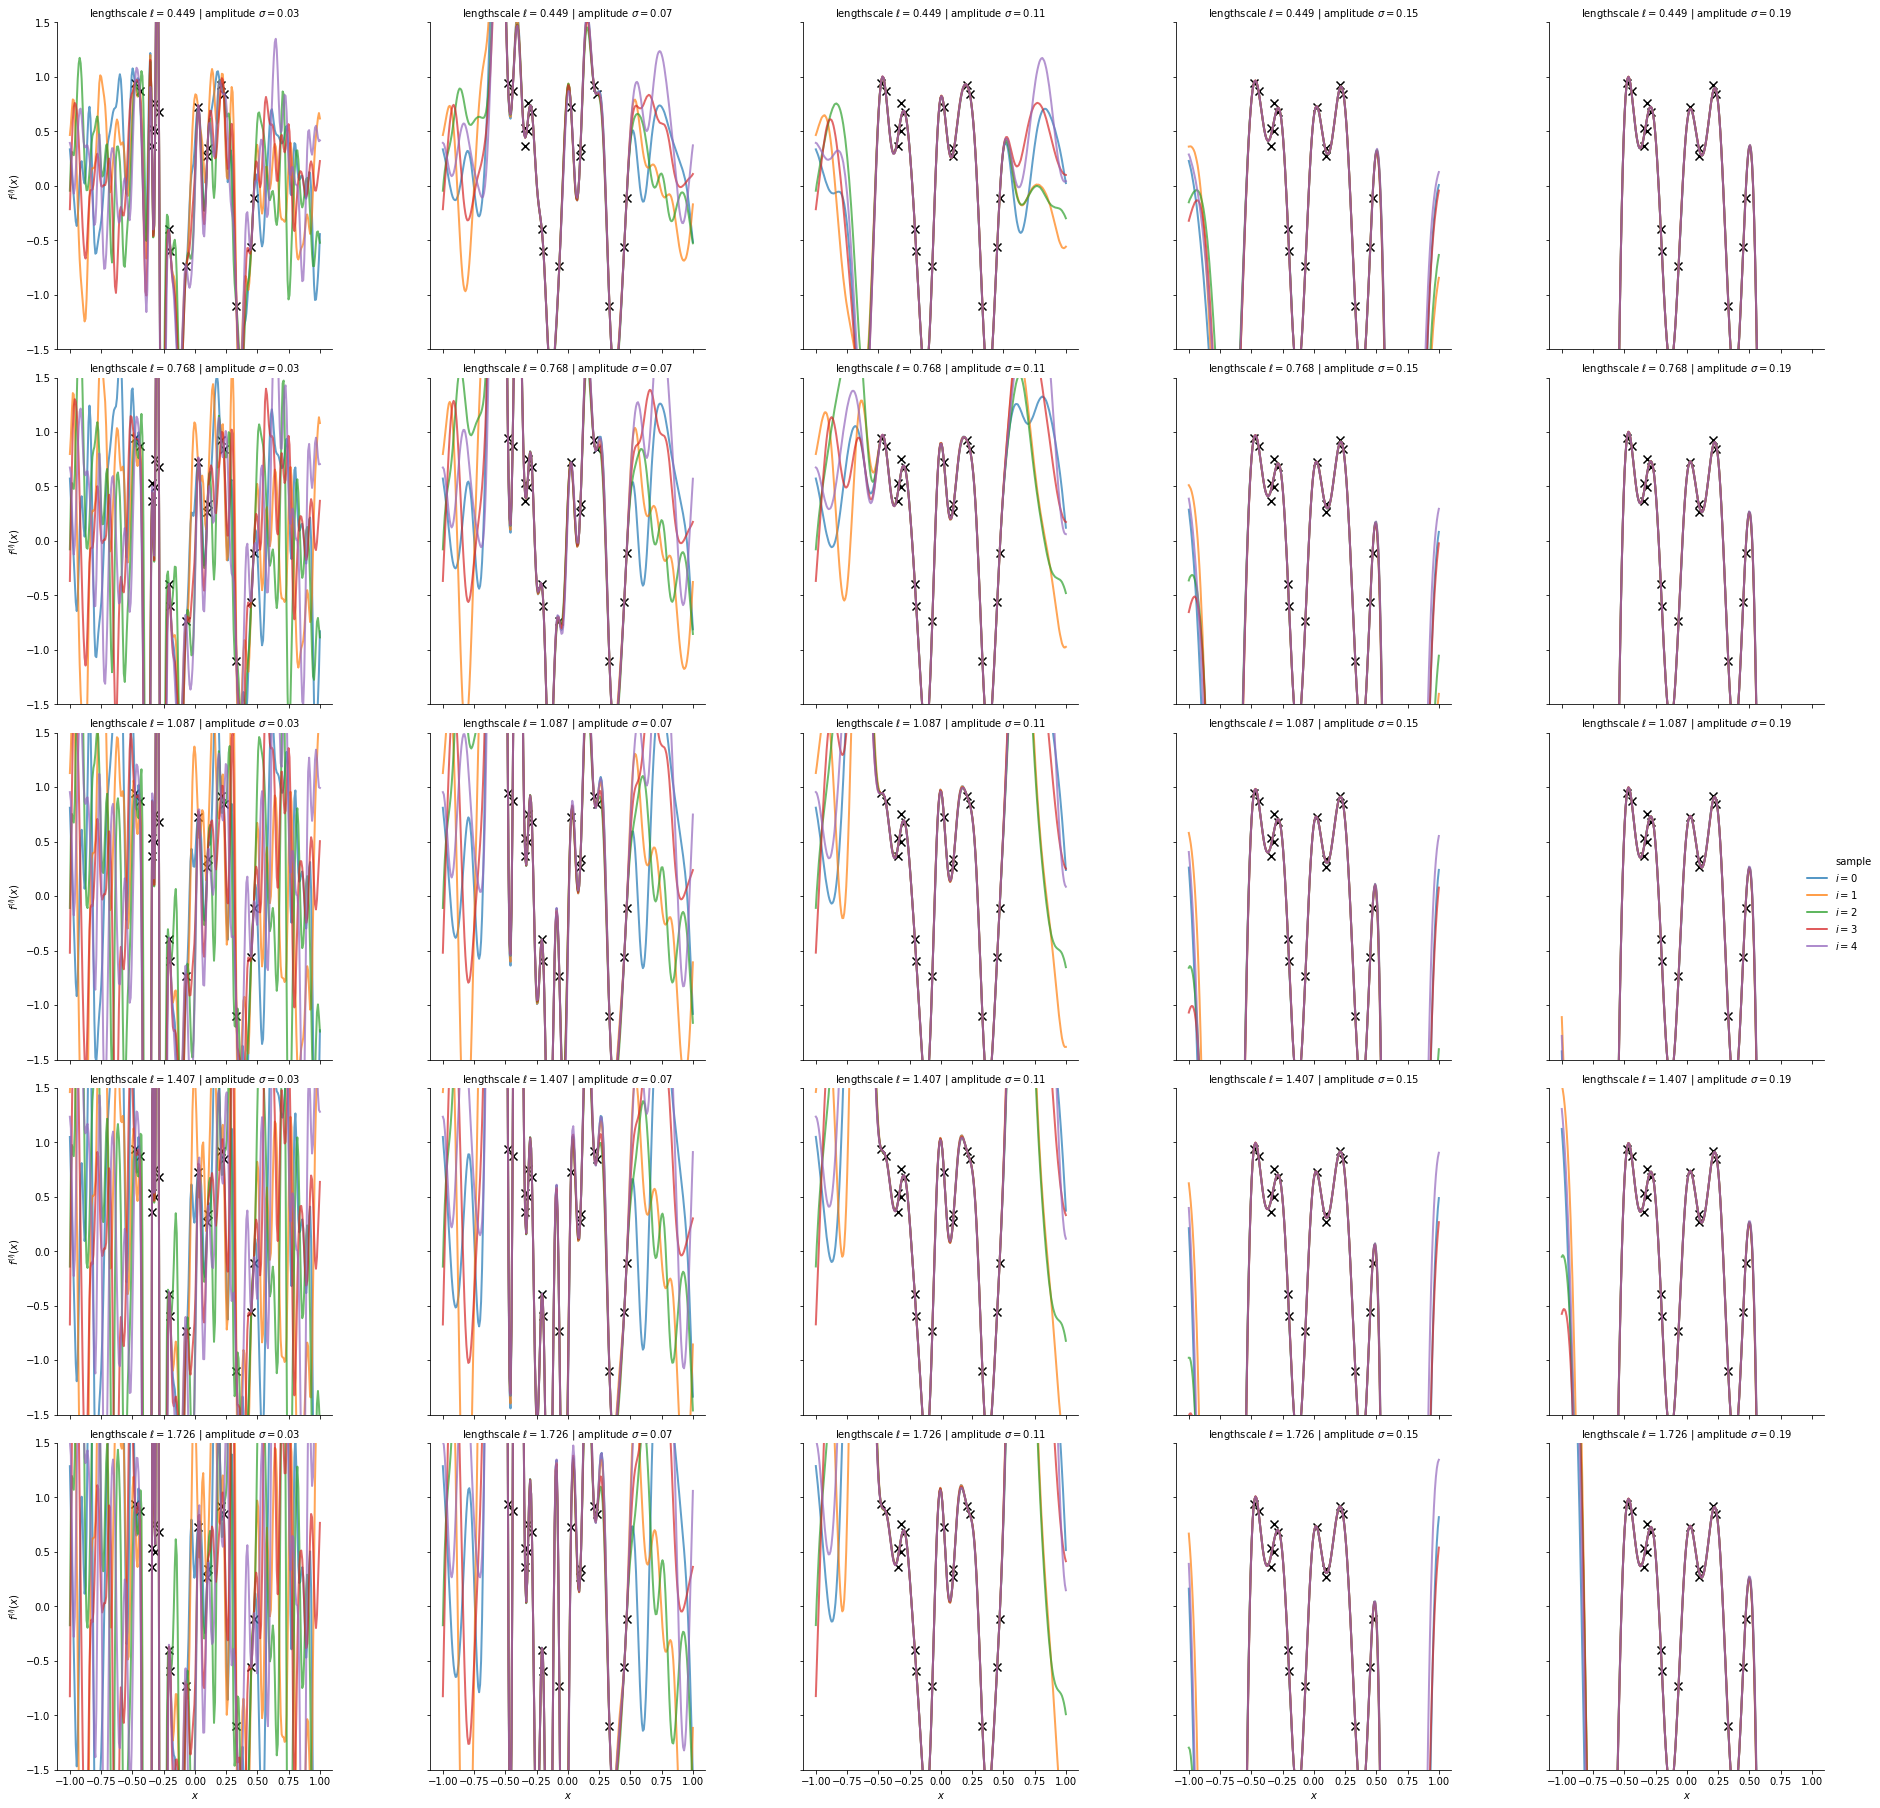

In [17]:
g = sns.relplot(x="index_point", y="function_value", hue="sample",
                row="amplitude", col="length_scale", height=5.0, aspect=1.0,
                kind="line", data=data, alpha=0.7, linewidth=2.0)
g.map(dateplot, X=X, Y=Y)
g.set_titles(row_template=r"lengthscale $\ell={{{row_name:.3f}}}$",
             col_template=r"amplitude $\sigma={{{col_name:.2f}}}$")
g.set_axis_labels(r"$x$", r"$f^{(i)}(x)$")
g.set(ylim=(-1.5, 1.5))